<b>Creating code to read in data 

In [310]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

flux_file = "StandardActinicFluxes2.csv"
cross_section_pina_colada = "pinacolone_pbe0_6311pgs_n256_gauss0.05.nm.tsv"
cross_section_cyclo = "cyclopentanone_pbe0_6311pgs_n512_gauss0.05.nm.tsv"

In [308]:
def process(file, delimiter):
    with open(file) as csv_file:
        csv_reader = reader(csv_file, delimiter=delimiter)
        data = list(csv_reader)
    data = np.asarray(data[1:]).transpose()
    return data.astype(float)

def photolysis(flux, cross, DU, title, ax):
    energy = cross[0]
    if DU == 'L':
        du = list(flux[3])
    elif DU == 'M':
        du = list(flux[4])
    elif DU == 'H':
        du = list(flux[5])
    flux_interp = np.interp(energy, list(flux[2]), du)
    j = flux_interp*cross[1]
    ax.plot(energy,j)
    ax.set(xlabel = "Wavelength /nm",
           ylabel = "Photolysis rate / ?",
          title = title)

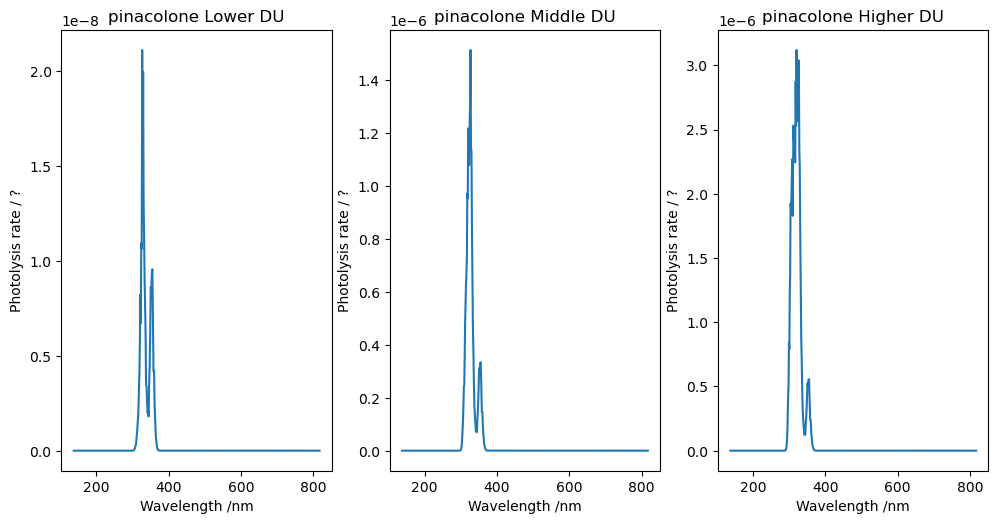

In [309]:
actinic = process(flux_file, ',')
pina_colada = process(cross_section_pina_colada, '\t')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (10,5))
fig.tight_layout()
photolysis(actinic, pina_colada, DU='L', title = "pinacolone Lower DU", ax = ax1)
photolysis(actinic, pina_colada, DU='M', title = "pinacolone Middle DU", ax = ax2)
photolysis(actinic, pina_colada, DU='H', title = "pinacolone Higher DU", ax = ax3)

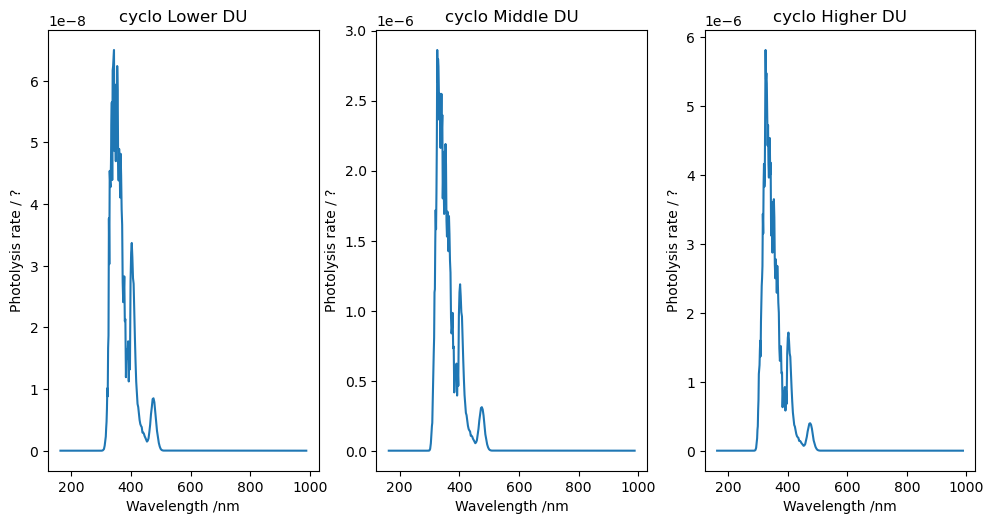

In [311]:
actinic = process(flux_file, ',')
cyclo = process(cross_section_cyclo, '\t')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (10,5))
fig.tight_layout()
photolysis(actinic, cyclo, DU='L', title = "cyclo Lower DU", ax = ax1)
photolysis(actinic, cyclo, DU='M', title = "cyclo Middle DU", ax = ax2)
photolysis(actinic, cyclo, DU='H', title = "cyclo Higher DU", ax = ax3)

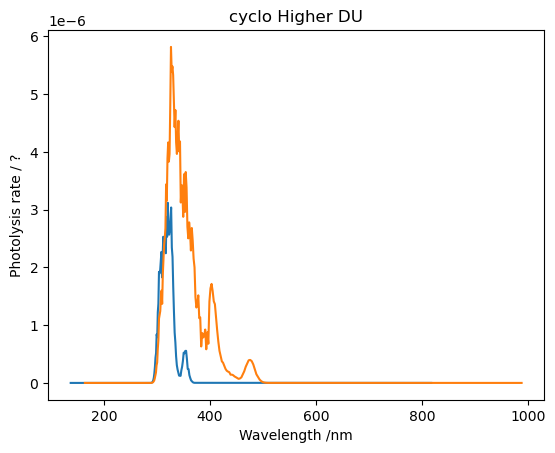

In [335]:
fig, ax1 = plt.subplots()
photolysis(actinic, pina_colada, DU='H', title = "pinacolone Higher DU", ax = ax1)
photolysis(actinic, cyclo, DU='H', title = "cyclo Higher DU", ax = ax1)

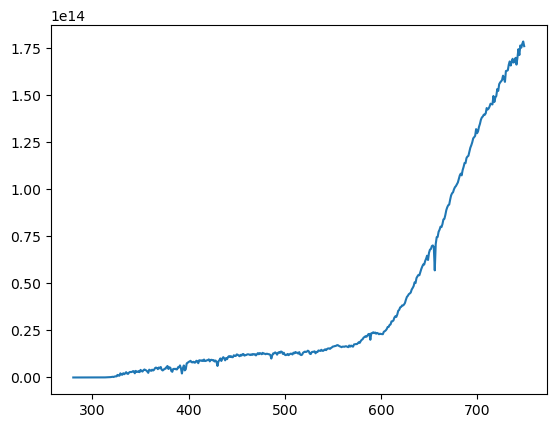

In [313]:
plt.plot(actinic[0], actinic[3])
plt.plot()

In [317]:
x = pd.read_csv(cross_section_cyclo, sep='\t')

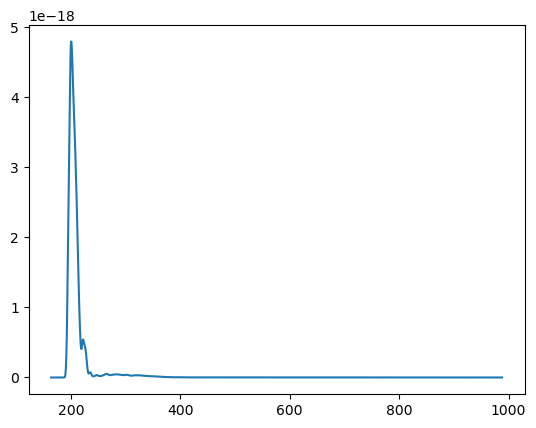

In [330]:
plt.plot(x['# Energy / nm'],x['Intensity / cm^2 per molecule'])

In [331]:
x['Intensity / cm^2 per molecule']

0      1.394174e-181
1      6.656360e-178
2      2.879273e-174
3      1.128379e-170
4      4.006394e-167
           ...      
398    3.362322e-117
399    4.154991e-120
400    4.652379e-123
401    4.720104e-126
402    4.339076e-129
Name: Intensity / cm^2 per molecule, Length: 403, dtype: float64